# Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

%config InlineBackend.figure_format = 'svg'

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_URL + "telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Univariate visualization

## Quantitative features

### Histograms and Density Plots

array([[<Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>]], dtype=object)

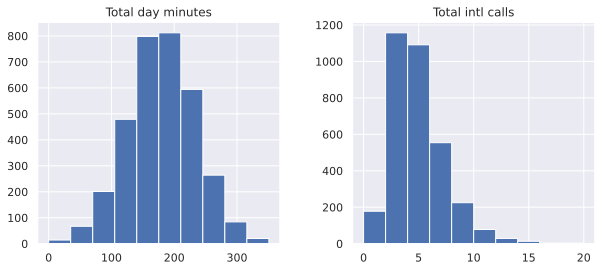

In [ ]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4))

**Kernel Density Plots**

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

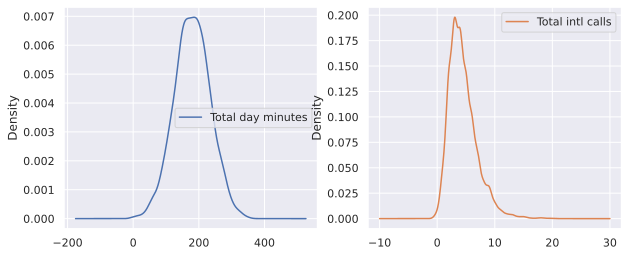

In [4]:
df[features].plot(kind='density', grid=True, subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4))

<Axes: xlabel='Total intl calls', ylabel='Density'>

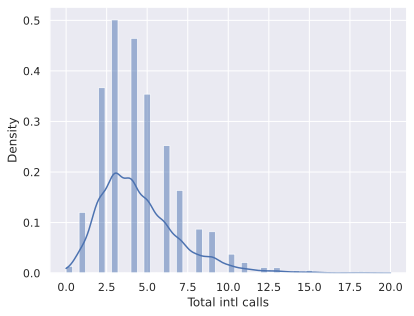

In [5]:
sns.histplot(df['Total intl calls'], kde=True, stat='density')

### Box Plot

<Axes: xlabel='Total intl calls'>

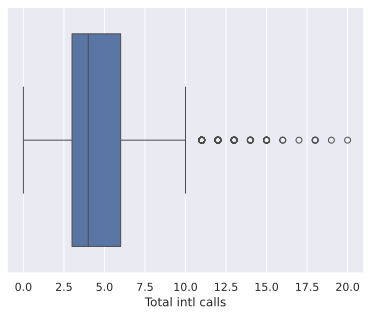

In [6]:
sns.boxplot(x='Total intl calls', data=df)

<Axes: ylabel='Total intl calls'>

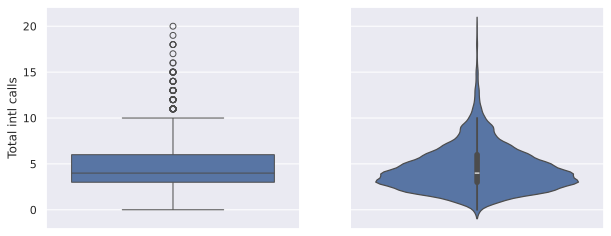

In [7]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0])
sns.violinplot(data=df['Total intl calls'], ax=axes[1])

### describe()

In [8]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


## Categorical and binary features

### Frequency Table

In [9]:
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

### Bar Plot

<Axes: xlabel='Customer service calls', ylabel='count'>

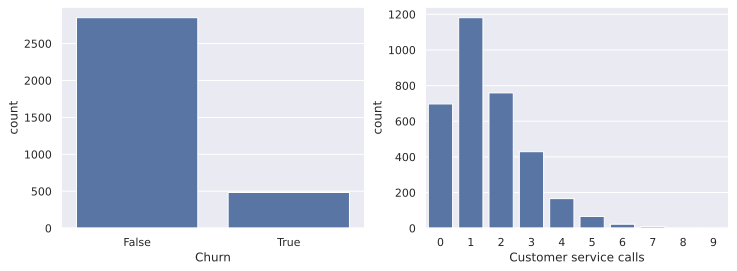

In [10]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])

# Multivariate visualization

## Quantitative vs Quantitative

### Correlation Matrix

<Axes: >

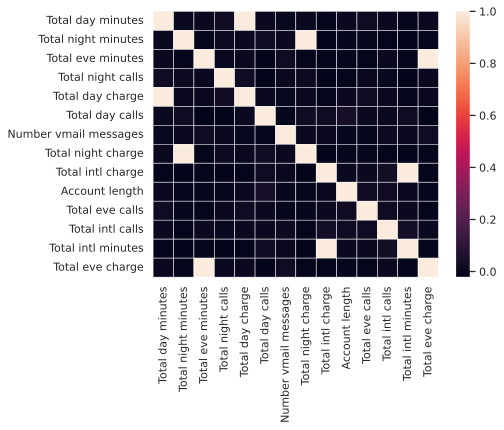

In [11]:
numerical_attributes = list(
  set(df.columns) 
  - set(
    ['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn', 'Customer service calls']
  )
)

correlation_matrix = df[numerical_attributes].corr()
sns.heatmap(correlation_matrix, linewidths=0.5)

In [12]:
numerical_attributes = list(
    set(numerical_attributes)
    - set(
        [
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
        ]
    )
)

### Scatter plots

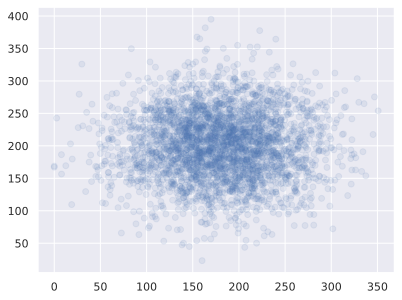

In [13]:
plt.scatter(df["Total day minutes"], df["Total night minutes"], alpha=0.1)

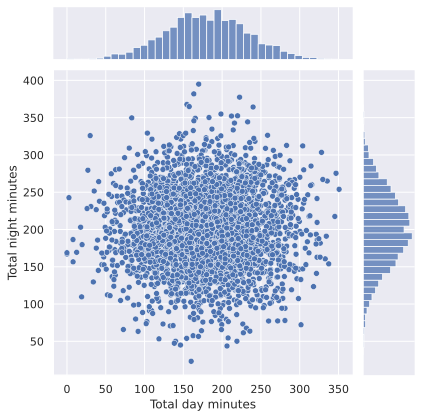

In [14]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='scatter');

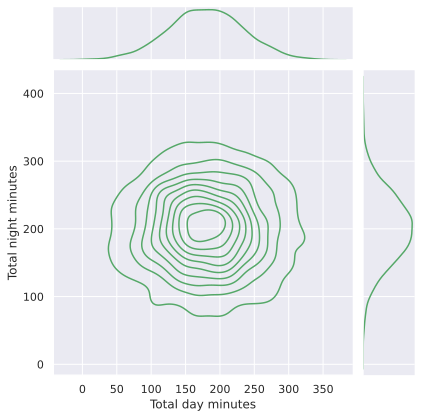

In [15]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='kde', color='g');

### Scatterplot Matrix

In [ ]:
# Pairplots may be slow for the svg format
%config InlineBackend.figure_format = 'png'

sns.pairplot(df[numerical_attributes]);

In [23]:
%config InlineBackend.figure_format = 'svg'

## Quantitative vs Categorical

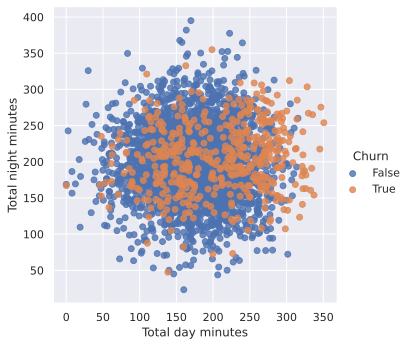

In [24]:
sns.lmplot(x='Total day minutes', y='Total night minutes', hue='Churn', data=df, fit_reg=False);

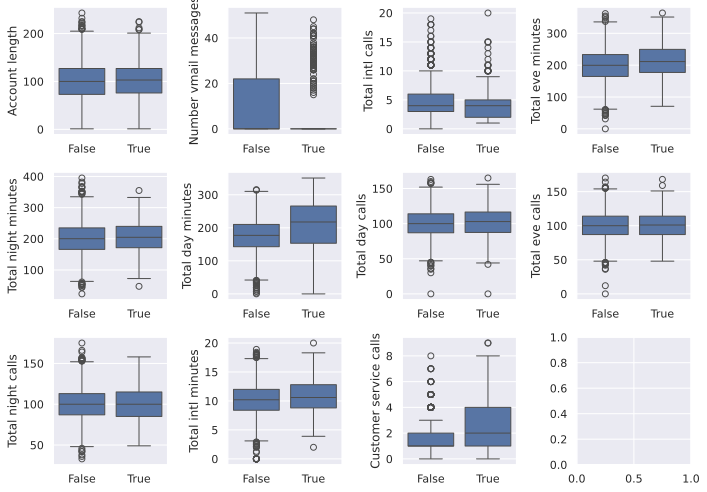

In [25]:
numerical_attributes.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))

for index, feature in enumerate(numerical_attributes):
  axis = axes[index // 4, index % 4]
  sns.boxplot(x='Churn', y=feature, data=df, ax=axis)
  axis.set_xlabel('')
  axis.set_ylabel(feature)

fig.tight_layout();

The greatest discrepancy in distribution between the two groups is for the features:
- Customer service calls
- Number vmail messages
- Total day minutes

<Axes: xlabel='Churn', ylabel='Total day minutes'>

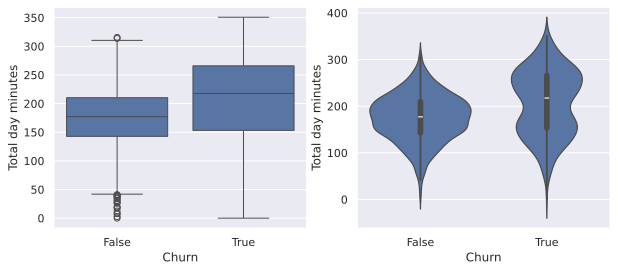

In [29]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0])
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1])

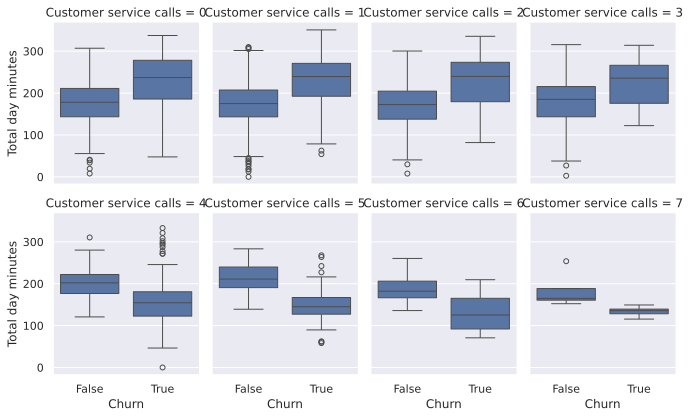

In [33]:
sns.catplot(
  x='Churn',
  y='Total day minutes',
  col='Customer service calls',
  data=df[df['Customer service calls'] < 8],
  kind='box',
  height=3,
  col_wrap=4,
  aspect=.8,
);

## Categorical vs Categorical

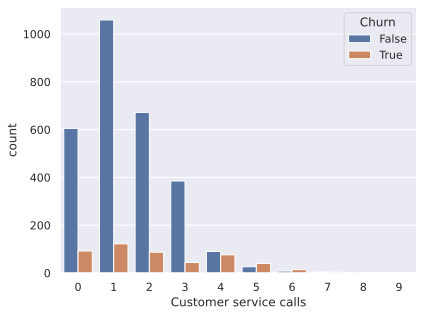

In [35]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

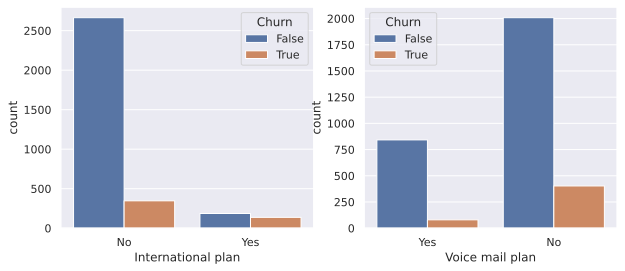

In [36]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

### Contingency Table

In [38]:
pd.crosstab(df['Churn'], df['State'], margins=True).T

Churn,False,True,All
State,,,
AK,49,3,52
AL,72,8,80
AR,44,11,55
AZ,60,4,64
CA,25,9,34
CO,57,9,66
CT,62,12,74
DC,49,5,54
DE,52,9,61


In [40]:
df.groupby('State')['Churn'].agg(['mean']).sort_values(by='mean', ascending=False).T

State,CA,NJ,TX,MD,SC,MI,MS,WA,NV,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


# Whole dataset visualizations

## t-SNE

t-SNE stands for *t-distributed Stochastic Neighbour Embedding*. It is a non linear *dimensionality reduction* method. The basic idea is as follows:
- Project a higher dimensional space (the various features of the dataset) onto a 2D plane (sometimes, 3D)
- Points closer together in the n-dimensional space (similar features, in a sense) are closer in the 2D plane
- Points farther apart in the n-dimensional space are farther apart in the plane

In [41]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler